# Machine Learning Project - AI BootCamp

📌 **목표:** 이번 프로젝트에서는 데이터셋을 사용하여 머신러닝 모델을 구축한 뒤 성능을 평가하고 비즈니스에 유의미한 인사이트를 도출해보고자 합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\yeink\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1) 데이터 선정 이유 및 문제 정의

### 데이터셋 요약

In [2]:
df = pd.read_csv('BankChurners.csv') # source: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [3]:
df.head() # 마지막 두 불필요한 column은 추후 데이터 전처리 과정에서 제거할 예정

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<img src="churn.png" width="500" align="left">

* 총 **10127명**의 은행고객들의 **18개 Feature들**(나이, 성별, 연봉, 혼인상태, 신용카드 한도 등)과 **계좌 해지 여부를 나타내는 Target Variable**(Existing Customer vs. Attrited Customer)을 포함한 데이터셋입니다.

### 선정 이유

* 많은 브랜드들이 기존 고객 유지보다 신규 고객 획득에 집중하고 있지만, 실제로는 재구매 고객이 전체 매출의 40% 가량을 차지하며 신규고객보다 구매를 완료할 확률이 9배나 높다고 합니다.

* 따라서 브랜드들은 고객의 이탈률을 막기 위해 **고객 이탈 원인을 상세히 분석**하고 **고객 유지 마케팅을 강화**하는 것이 매우 중요합니다.

* 저의 현재 주요 관심사는 **인공지능 마케팅** 분야인데, 이번 프로젝트를 통해 고객이나 판매 기회를 잃기 전에 대개 어떤 행동이 선행되는지 찾아내고, 어떤 요인이 고객 유지에 영향을 미치는지 정확하게 이해하고자 합니다.

### 문제 정의

* 고객의 다양한 Attribute들을 토대로 예측하고자 하는 것이 **고객의 이탈 여부(Existing Customer vs. Attrited Customer)**이기 때문에 이 데이터셋은 **분류(Classification) 문제**로 접근해야 합니다.

## 2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택

### 타겟 선정 이유

* 고객별 이탈 위험도를 고려하지 않고 무작위로 일부 고객들을 뽑아 마케팅 활동을 전개하는 경우 이탈 고객들을 막지 못하게 되는 가능성이 매우 높아집니다. 그렇다고 모든 고객들을 대상으로 마케팅 활동을 진행하게 되면 별도의 마케팅 활동이 없어도 유지되는 고객층을 확보하는데 불필요한 마케팅 비용을 사용하게 됩니다.

* 따라서 저는 머신러닝 모델링을 통해 **고객의 이탈 여부를 미리 예측하여 이탈 가능성이 높은 고객들에게 선제적으로 접근하여 마케팅 활동**(웹사이트 팝업, 이메일 캠페인, 다른 상품 추천, 상담원 연결 등)**을 전개**하고자 합니다. 이탈 위험도가 높은 고객들을 찾아내 그 고객층에만 집중한다면 효율적인 마케팅 활동을 진행할 수 있고 마케팅 비용 또한 절감할 수 있습니다. 

### 베이스라인 모델

In [4]:
# 분류모델
target = df['Attrition_Flag']
target.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

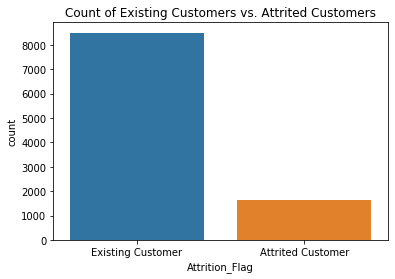

In [5]:
%matplotlib inline
plt.title('Count of Existing Customers vs. Attrited Customers')
sns.countplot(x=target);

* **분류문제**에서는 보통 타겟 변수에서 가장 빈번하게 나타나는 범주(**Majority class baseline**)를 기준모델로 설정하는데 이 데이터셋의 경우 최다클래스가 "Existing Customer"이므로 **"Existing Customer"가 기준모델**이 됩니다.

### 평가지표

* Target의 분포가 84:16의 비율로 나누어지는 **Imbalanced data**이므로 Accuracy 대신 **Precision, Recall, F1 Score, ROC Curve, AUC** 등의 다른 성능 평가지표를 사용하고자 합니다.
* 그 중에서도 **Recall Score**를 향상시키는데 초첨을 둘 것입니다. Recall Score가 낮다는 것은 모델을 통해 이탈을 예측하지 못해 결국은 은행을 떠나는 고객의 수가 많다는 뜻인데, 은행에서는 이 상황을 가장 막고 싶을 것입니다.

## 3) EDA와 데이터 전처리

### 데이터 전처리

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Features:**

* **CLIENTNUM:** 고객 식별번호
* **Customer_Age:** 나이
* **Gender:** 성별 (M=남성, F=여성)
* **Dependent_count:** 부양가족 수
* **Education_Level:** 최종 학력 (High School, College, Graduate, Post-Graduate, Doctorate, Uneducated, Unknown)
* **Marital_Status:** 혼인 상태 (Married, Single, Divorced, Unknown)
* **Income_Category:** 연봉 카테고리 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
* **Card_Category:** 카드 종류 (Blue, Silver, Gold, Platinum)
* **Month_on_book:** 해당 은행과의 거래 기간 (단위: 개월)
* **Total_Relationship_Count:** 해당 은행에서 개설한 계좌/상품의 수
* **Months_Inactive_12_mon:** 지난 12개월간 활동내역이 없는 개월 수
* **Contacts_Count_12_mon:** 지난 12개월간 컨택 횟수
* **Credit_Limit:** 신용카드 한도
* **Total_Revolving_Bal:** 신용카드 미납(연체) 금액 (바로 납부하지 않아 다음 달로 넘어가는 금액)
* **Avg_Open_To_Buy:** Credit_Limit - Total_Revolving_Bal
* **Total_Amt_Chng_Q4_Q1:** 1분기와 4분기 간 거래금액 차이 
* **Total_Trans_Amt:** 지난 12개월간 총 거래금액
* **Total_Trans_Ct:** 지난 12개월간 총 거래횟수
* **Total_Ct_Chng_Q4_Q1:** 1분기와 4분기 간 거래횟수 차이 
* **Avg_Utilization_Ratio:** 평균 카드 총한도 대비 빚 (Credit_Limit ÷ Total_Revolving_Bal)
* **Naive_Bayes_Classifiers:** 불필요한 Column

In [7]:
# Delete last two unnecessary columns
df = df.iloc[:, :-2]

In [8]:
df = df.drop(['CLIENTNUM'], axis=1) # 모델링 시 필요없는 식별번호 Column 제거

In [9]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [10]:
for i in df.loc[:, df.dtypes == object].columns:
    print(i,":",df[i].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


In [11]:
pd.set_option('display.max_columns', None)
df.head(50)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


### 결측치 및 중복값 처리

In [12]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

이미 결측치 없이 채워진 데이터셋입니다.

In [13]:
len(df[df['Education_Level']=='Unknown'])

1519

In [14]:
len(df[df['Marital_Status']=='Unknown'])

749

In [15]:
len(df[df['Income_Category']=='Unknown'])

1112

Education Level, Marital Status, Income Category는 Unknown으로 표기되어 있는 행이 1000개 이상 존재하기 때문에 일단 제거하지 않았습니다. 추후 필요시 Unknown을 평균값으로 대체하겠습니다.

In [16]:
len(df[df.duplicated()==True])

0

중복되는 Row도 없으므로 중복값 제거는 하지 않았습니다.

### 이상치 확인

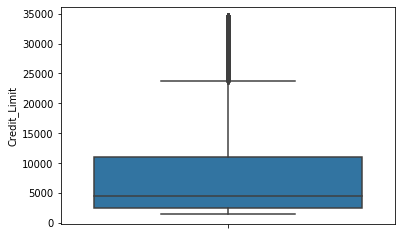

In [17]:
sns.boxplot(y = 'Credit_Limit', data=df);

이상치처럼 보이는 값들이 있긴 하나 Credit Limit이 평균적인 고객들보다 월등히 높은 고객들이 당연히 존재할 수 있기 때문에 따로 제거하지 않았습니다.

### Feature Engineering

In [18]:
def engineer(df):
    # 평균 거래 금액
    df['Avg_Trans_Amt'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']
    
    # 순서가 존재하는 Categorical Feature들은 미리 Mapping을 활용한 Ordinal Encoding 진행 
    # (1) Income Category ('Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +', 'Unknown'은 0으로 대체)
    Income_dict = {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K' : 3, '$80K - $120K': 4, '$120K +': 5, 'Unknown': 0}
    df["Income_Ordinal"] = df['Income_Category'].map(Income_dict)
    
    # (2) Card Category ('Blue' < 'Silver' < 'Gold' < 'Platinum')
    Card_dict = {'Blue': 1, 'Silver': 2, 'Gold' : 3, 'Platinum': 4}
    df["Card_Ordinal"] = df['Card_Category'].map(Card_dict)
        
    # (3) Education Level ('Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate', 'Unknown'은 0으로 대체)
    Educ_dict = {'Uneducated': 1, 'High School': 2, 'College' : 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6, 'Unknown': 0}
    df["Educ_Ordinal"] = df['Education_Level'].map(Educ_dict)
    
    df = df.drop(['Income_Category', 'Card_Category', 'Education_Level'], axis=1)
    # 나머지 Categorical Feature(Gender, Marital Status)는 순서와 관련없기 때문에 Pipeline 설정 시 OneHotEncoding나 TargetEncoding 사용
    
    # 향후 모델링의 편의성을 위해 Target값을 0 또는 1의 Binary Number로 변환 (Attrited Customer = 1, Existing Customer = 0)
    df.loc[df.Attrition_Flag == 'Existing Customer', 'Attrition_Flag'] = 0
    df.loc[df.Attrition_Flag == 'Attrited Customer', 'Attrition_Flag'] = 1
    df = df.astype({'Attrition_Flag': np.int64})
    
    return df

df = engineer(df)

In [19]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans_Amt,Income_Ordinal,Card_Ordinal,Educ_Ordinal
0,0,45,M,3,Married,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,27.238095,3,1,2
1,0,49,F,5,Single,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,39.121212,1,1,4
2,0,51,M,3,Married,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,94.350000,4,1,4
3,0,40,F,4,Unknown,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,58.550000,1,1,2
4,0,40,M,3,Married,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,29.142857,3,1,1


### Data Leakage

특정 특성의 정보 누수로 인해 타겟값이 영향을 받는다면 그 특성을 제거해줘야 하지만 이 데이터셋의 경우 타겟값에 직접적인 영향을 주는 Feature는 없기 때문에 따로 데이터셋을 건들지 않았습니다.

### EDA

#### <데이터 살펴보기>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Marital_Status            10127 non-null  object 
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

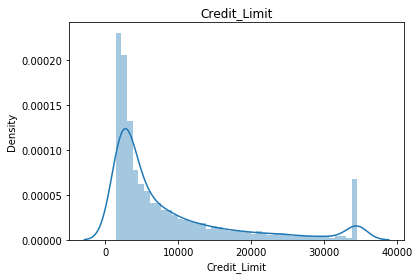

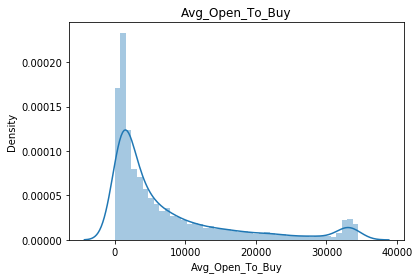

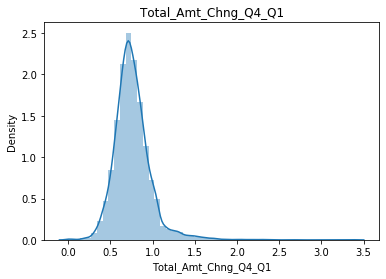

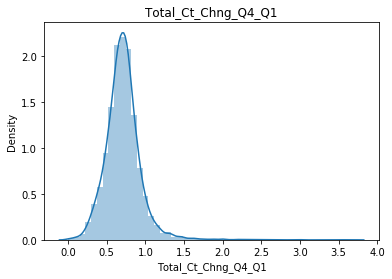

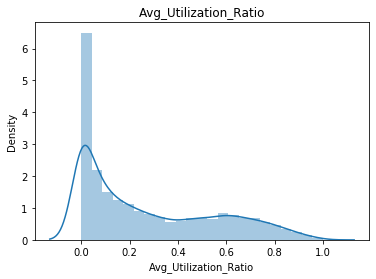

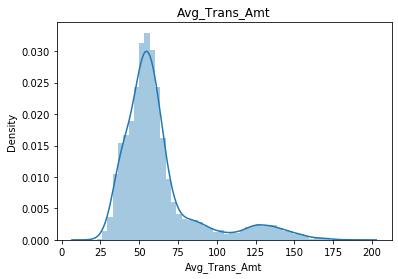

In [21]:
# Continuous Features
continuous_features = df.select_dtypes(['float64']).columns.to_list()

for cont_feature in continuous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(df[cont_feature])

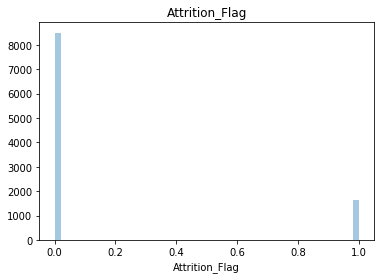

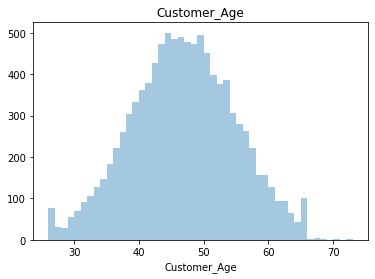

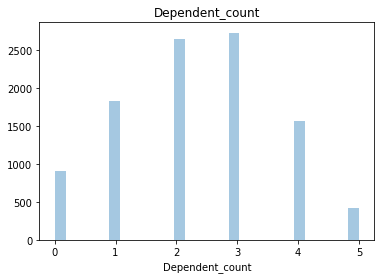

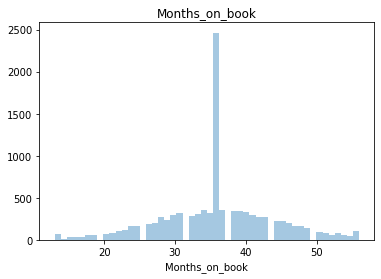

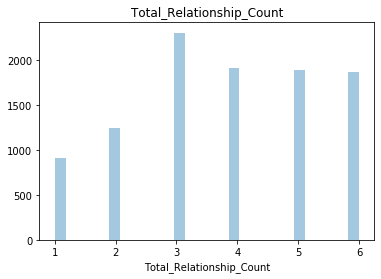

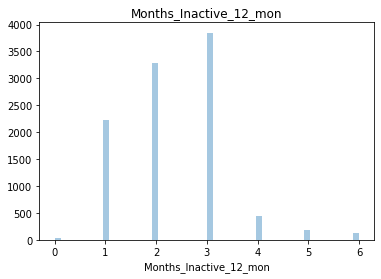

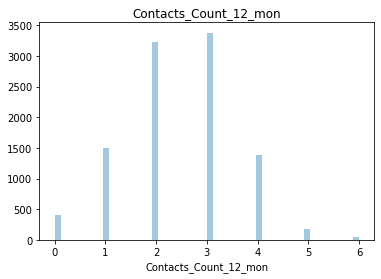

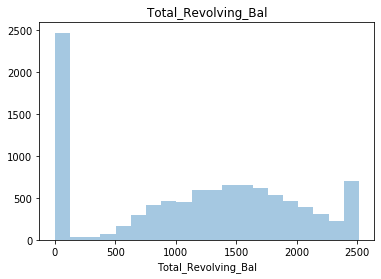

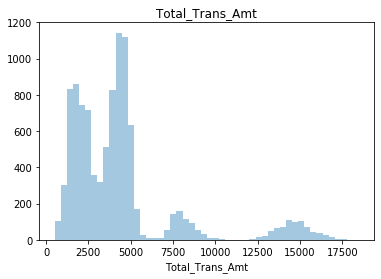

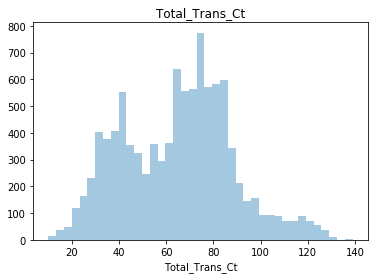

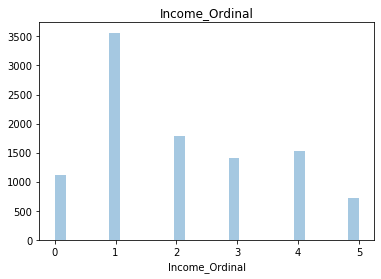

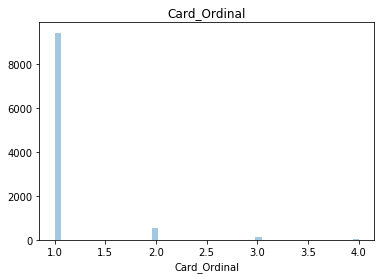

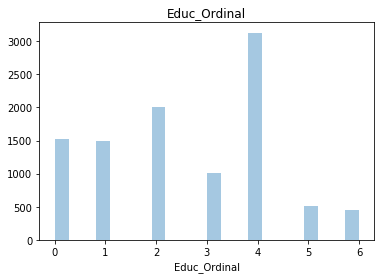

In [22]:
# Discrete Features
discrete_features = df.select_dtypes(['Int64']).columns.to_list()

for disc_feature in discrete_features: 
    plt.figure()
    plt.title(disc_feature)
    ax = sns.distplot(df[disc_feature], kde = False)

#### <상관계수>

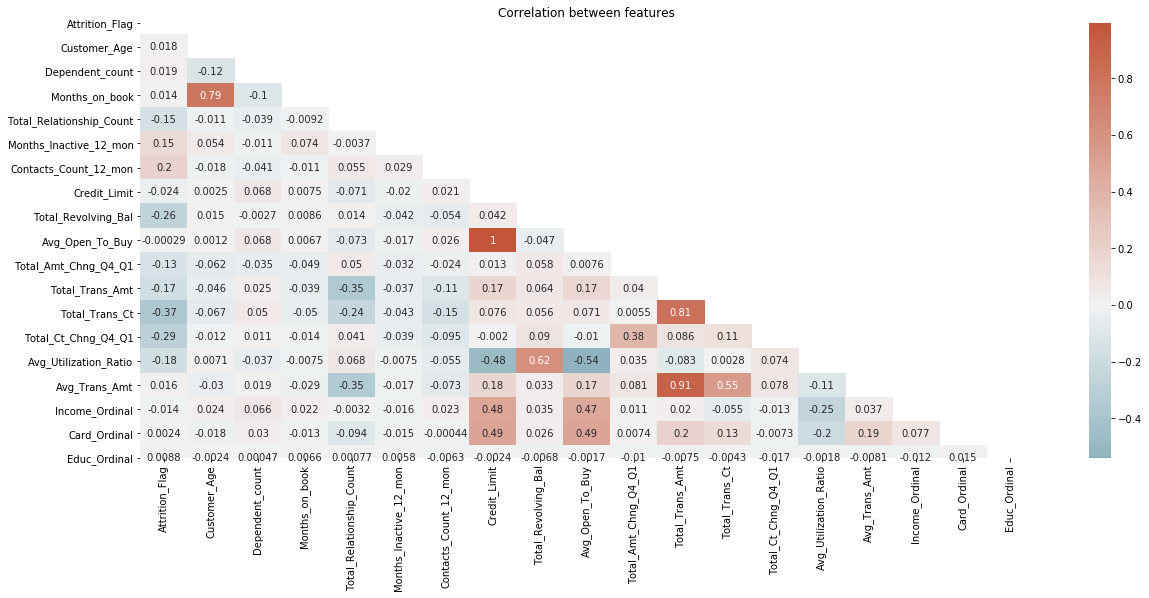

In [23]:
plt.figure(figsize=(20,8))
plt.title("Correlation between features")
mask = np.zeros_like(np.array(df.corr()))
mask[np.triu_indices_from(mask)] = True
sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), mask=mask, annot=True, center = 0);

**Positive Correlations:**
* Credit Limit, Avg Open To Buy (1)
* Total Trans Amt, Avg Trans Amt (0.91)
* Total Trans Ct, Total Trans Amt (0.81)
* Months On Book, Customer Age (0.79)
* Avg Utilization Ratio, Total Revolving Bal (0.62)
* Income Ordinal, Credit Limit (0.57)
* Income Ordinal, Avg Open To Buy (0.56)
* Total Trans Ct, Avg Trans Amt (0.55)
* Card Ordinal, Credit Limit (0.49)

**Negative Correlations:**
* Avg Utilization Ratio, Avg Open To Buy (-0.54)
* Credit Limit, Avg Utilization Ratio (-0.48)
* Total Relationship Count, Total Trans Amount (-0.35)
* Total Relationship Count, Total Avg Amount (-0.35)
* Avg Utilization Ratio, Income Ordinal (-0.33)

**Attrition 여부(Target)와 연관성이 높은 Feature들**
* **Positive:** Contacts Count_12 mon, Months Inactive_12 mon
* **Negative:** Total Trans Ct, Total Ct_Chng Q4 Q1, Total Revolving Bal, Avg Utilization Ratio

#### <Existing vs. Attrited Customers Feature 비교 (Boxplot)>

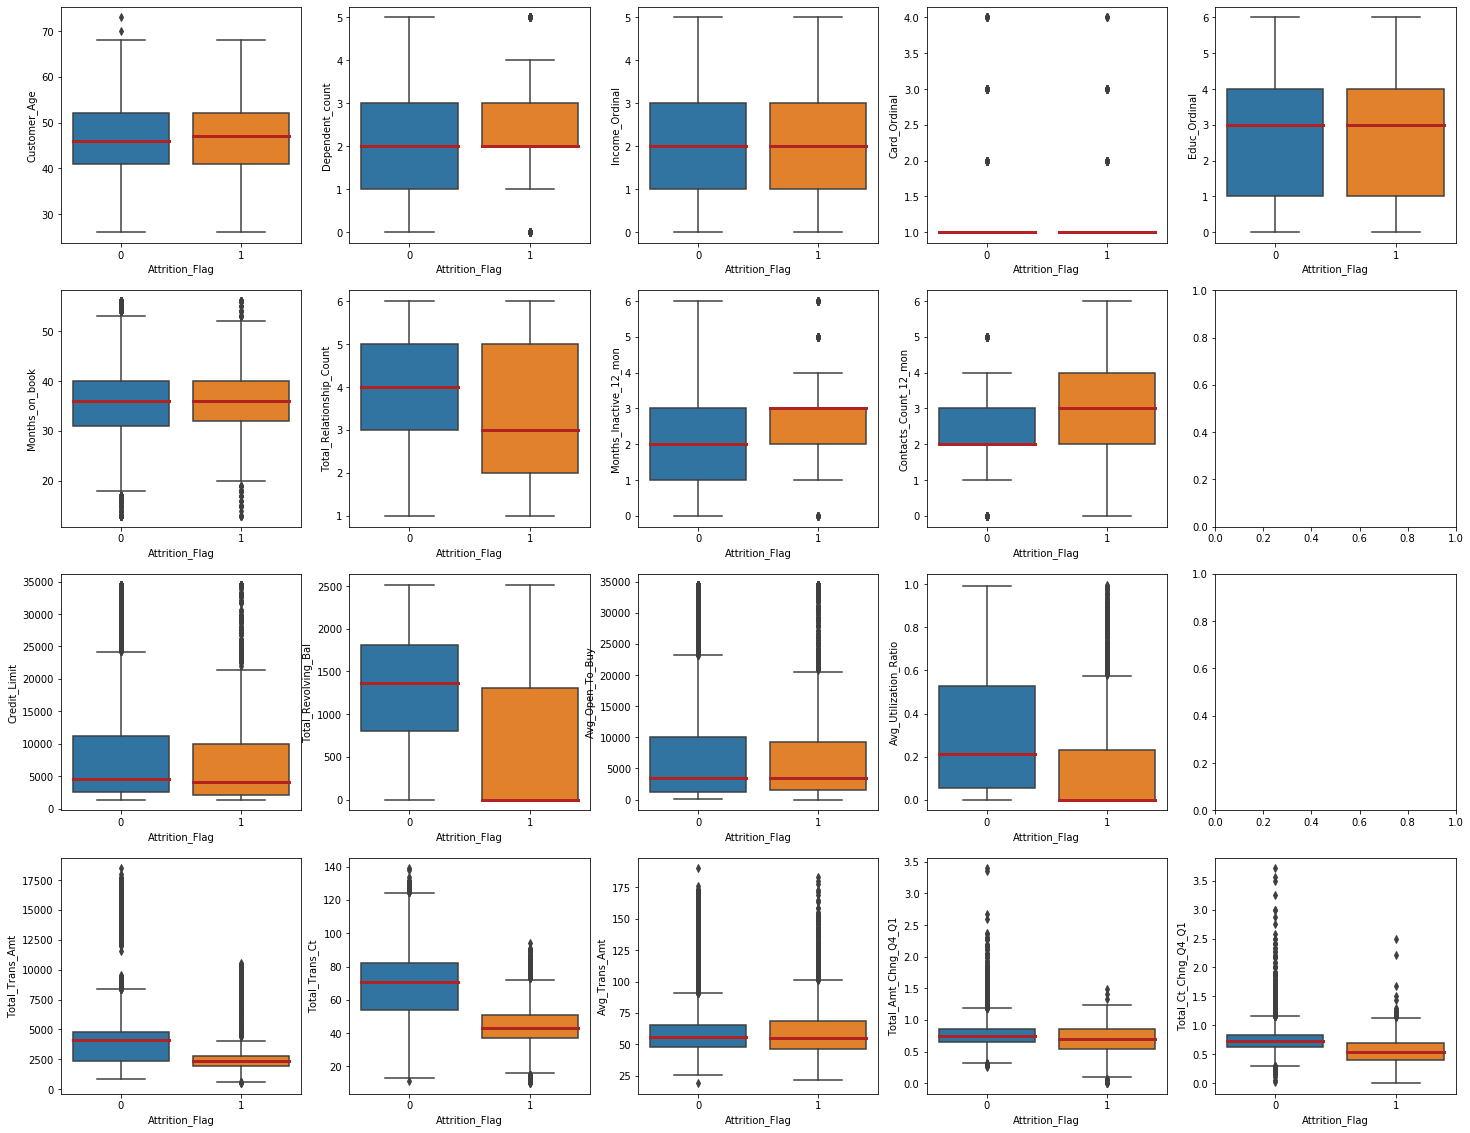

In [24]:
f, axes = plt.subplots(nrows=4, ncols=5, figsize=(25,20))
medianprops = dict(linestyle='-', linewidth=3, color='firebrick')

sns.boxplot(x="Attrition_Flag", y="Customer_Age", medianprops=medianprops, data=df, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Dependent_count", medianprops=medianprops, data=df, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Income_Ordinal", medianprops=medianprops, data=df, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Card_Ordinal", medianprops=medianprops, data=df, ax=axes[0,3])
sns.boxplot(x="Attrition_Flag", y="Educ_Ordinal", medianprops=medianprops, data=df, ax=axes[0,4])

sns.boxplot(x="Attrition_Flag", y="Months_on_book", medianprops=medianprops, data=df, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", medianprops=medianprops, data=df, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", medianprops=medianprops, data=df, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon", medianprops=medianprops, data=df, ax=axes[1,3])

sns.boxplot(x="Attrition_Flag", y="Credit_Limit", medianprops=medianprops, data=df, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", medianprops=medianprops, data=df, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", medianprops=medianprops, data=df, ax=axes[2,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", medianprops=medianprops, data=df, ax=axes[2,3])

sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", medianprops=medianprops, data=df, ax=axes[3,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", medianprops=medianprops, data=df, ax=axes[3,1])
sns.boxplot(x="Attrition_Flag", y="Avg_Trans_Amt", medianprops=medianprops, data=df, ax=axes[3,2])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", medianprops=medianprops, data=df, ax=axes[3,3])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", medianprops=medianprops, data=df, ax=axes[3,4]);

**Existing vs. Attrited Customers 간 유의한 차이를 보이는 Feature:**
* **Positive:** Months Inactive_12 mon, Contacts Count_12 mon
* **Negative:** Total Relationship Count, Total Revolving Bal, Avg Utilization Ratio, Total Trans Amt, Total Trans Ct, Total Ct_Chng Q4 Q1

위 Correlation Heatmap으로 살펴본 결과와 상당히 유사하다는 것을 알 수 있습니다.

Attrition 여부(Target)와 연관성이 매우 낮으며 'Credit Limit'이라는 다른 Feature를 그대로 설명하는 'Avg Open to Buy' 특성은 삭제하고자 합니다.

In [25]:
df = df.drop('Avg_Open_To_Buy', axis=1)

In [26]:
df.head() # 최종 데이터셋 완성

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans_Amt,Income_Ordinal,Card_Ordinal,Educ_Ordinal
0,0,45,M,3,Married,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,27.238095,3,1,2
1,0,49,F,5,Single,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,39.121212,1,1,4
2,0,51,M,3,Married,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,94.350000,4,1,4
3,0,40,F,4,Unknown,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,58.550000,1,1,2
4,0,40,M,3,Married,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,29.142857,3,1,1


## 4) 머신러닝 방식 적용 및 교차검증

### Train, Test 데이터셋 분할

In [27]:
from sklearn.model_selection import train_test_split

target = 'Attrition_Flag'

train, test = train_test_split(df, train_size=0.8, random_state=2)
train, val = train_test_split(train, train_size=0.8, random_state=2)

print("train shape: ", val.shape)
print("val shape: ", test.shape)

train shape:  (1621, 20)
val shape:  (2026, 20)


In [28]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

### 1차 모델 학습

In [29]:
!pip install -U scikit-learn
!pip install lightgbm
!pip install xgboost
!pip install imblearn
!pip install statsmodels==0.10.0rc2 --pre
!pip install category_encoders
!pip install eli5


from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


모델 파라미터에서 **Class weight을 Balanced**로 조정해주어 **불균형 데이터(Imbalanced Data)의 문제를 해결**하고자 합니다. 이 방법 외에도 SMOTE(Synthetic Minority Oversampling Technique)를 이용해 불균형 문제를 처리할 수도 있는데 이 기법은 추후 다른 프로젝트에서 사용해볼 것입니다. SMOTE는 데이터의 개수가 적은 클래스의 표본을 가져온 뒤 임의의 값을 추가하여 새로운 샘플을 만들어 데이터에 추가하는 오버샘플링 방식입니다.

#### <0. Baseline Model>

In [30]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측.
y_pred_val_0 = [major] * len(y_val)

print("mode: ", major)

mode:  0


In [31]:
print(classification_report(y_val, y_pred_val_0));

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1356
           1       0.00      0.00      0.00       265

    accuracy                           0.84      1621
   macro avg       0.42      0.50      0.46      1621
weighted avg       0.70      0.84      0.76      1621



In [32]:
print("기준모델 Accuracy Score:", accuracy_score(y_val, y_pred_val_0))
print("기준모델 Precision Score:", precision_score(y_val, y_pred_val_0))
print("기준모델 Recall Score:", recall_score(y_val, y_pred_val_0))
print("기준모델 F1 Score:", f1_score(y_val, y_pred_val_0))
auc_score_0 = roc_auc_score(y_val, y_pred_val_0)
print("기준모델 AUC Score:", auc_score_0)

기준모델 Accuracy Score: 0.8365206662553979
기준모델 Precision Score: 0.0
기준모델 Recall Score: 0.0
기준모델 F1 Score: 0.0
기준모델 AUC Score: 0.5


이 데이터셋은 Target의 분포가 84:16의 비율로 나누어지는 Imbalanced data이므로 최다클래스인 "Existing Customer"를 기준모델로 설정하게 되면 모델에 유의미한 학습을 시키지 않아도 Accuracy Score는 이미 84%에 육박하게 됩니다. 하지만, 모델의 성능을 더 정확하게 평가할 수 있는 **Precision, Recall, F1 Score 지표들은 0**임을 알 수 있습니다.

#### <1. Logistic Regression>

In [33]:
pipe1 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    StandardScaler(), # 특성값 표준화, 결측치가 없으므로 Imputer는 필요 X
    LogisticRegression(n_jobs=-1, class_weight='balanced', random_state=2)
)

pipe1.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Marital_Status'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=2))])

In [34]:
y_pred_val_1 = pipe1.predict(X_val)

In [35]:
print(classification_report(y_val, y_pred_val_1));

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1356
           1       0.56      0.86      0.68       265

    accuracy                           0.86      1621
   macro avg       0.76      0.86      0.80      1621
weighted avg       0.90      0.86      0.88      1621



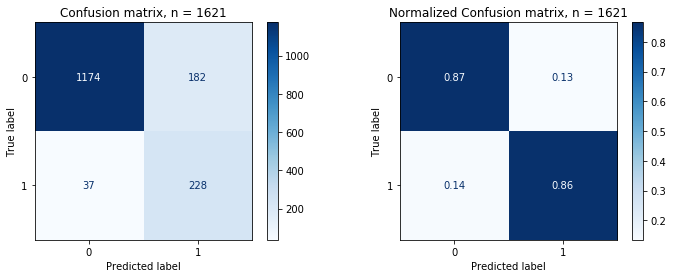

In [36]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

plot_confusion_matrix(pipe1, X_val, y_val,
                            cmap=plt.cm.Blues, 
                            ax=axes[0]);
axes[0].set_title(f'Confusion matrix, n = {len(y_val)}');

plot_confusion_matrix(pipe1, X_val, y_val,
                            normalize='true',
                            cmap=plt.cm.Blues, 
                            ax=axes[1]);
axes[1].set_title(f'Normalized Confusion matrix, n = {len(y_val)}');

In [37]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_val, y_pred_val_1))
print("Logistic Regression Precision Score:", precision_score(y_val, y_pred_val_1))
print("Logistic Regression Recall Score:", recall_score(y_val, y_pred_val_1))
print("Logistic Regression F1 Score:", f1_score(y_val, y_pred_val_1))
y_pred_proba_1 = pipe1.predict_proba(X_val)[:, 1] # 이탈 확률
auc_score_1 = roc_auc_score(y_val, y_pred_proba_1)
print("Logistic Regression AUC Score:", auc_score_1)

Logistic Regression Accuracy Score: 0.864898210980876
Logistic Regression Precision Score: 0.5560975609756098
Logistic Regression Recall Score: 0.8603773584905661
Logistic Regression F1 Score: 0.6755555555555556
Logistic Regression AUC Score: 0.9389519674959649


기존모델에 비해 Accuracy Score, Precision Score, Recall Score, F1 Score 모두 크게 향상한 모습을 볼 수 있습니다. 하지만 Recall Score과 F1 Score를 봤을 때 **Logistic Regression 모델은 최상의 성능을 보여주는 모델은 아닌 것** 같습니다. 

#### <2. Decision Tree Classifier>

In [38]:
pipe2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=2, criterion='entropy')
) # 복잡한 트리는 과적합 가능성을 높이기 때문에 Max_depth을 통해 복잡도를 낮추어 일반화를 유도합니다. 

pipe2.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Marital_Status'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=7,
                                        random_state=2))])

In [39]:
y_pred_val_2 = pipe2.predict(X_val)

In [40]:
print(classification_report(y_val, y_pred_val_2));

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1356
           1       0.62      0.91      0.74       265

    accuracy                           0.90      1621
   macro avg       0.80      0.90      0.84      1621
weighted avg       0.92      0.90      0.90      1621



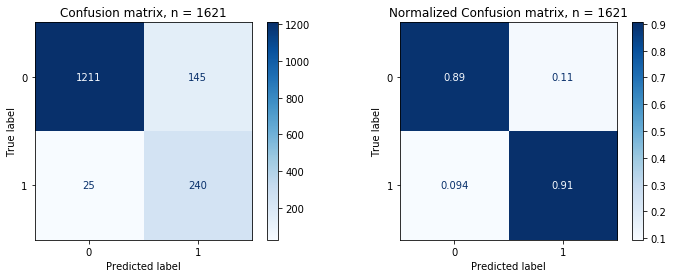

In [41]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

plot_confusion_matrix(pipe2, X_val, y_val,
                            cmap=plt.cm.Blues, 
                            ax=axes[0]);
axes[0].set_title(f'Confusion matrix, n = {len(y_val)}');

plot_confusion_matrix(pipe2, X_val, y_val,
                            normalize='true',
                            cmap=plt.cm.Blues, 
                            ax=axes[1]);
axes[1].set_title(f'Normalized Confusion matrix, n = {len(y_val)}');

In [42]:
print("Decision Tree Classifier Train Accuracy Score:", pipe2.score(X_train, y_train))
print("Decision Tree Classifier Val Accuracy Score:", accuracy_score(y_val, y_pred_val_2))
print("Decision Tree Classifier Precision Score:", precision_score(y_val, y_pred_val_2))
print("Decision Tree Classifier Recall Score:", recall_score(y_val, y_pred_val_2))
print("Decision Tree Classifier F1 Score:", f1_score(y_val, y_pred_val_2))
y_pred_proba_2 = pipe2.predict_proba(X_val)[:, 1] # 이탈 확률
auc_score_2 = roc_auc_score(y_val, y_pred_proba_2)
print("Decision Tree Classifier AUC Score:", auc_score_2)

Decision Tree Classifier Train Accuracy Score: 0.9137345679012345
Decision Tree Classifier Val Accuracy Score: 0.8951264651449723
Decision Tree Classifier Precision Score: 0.6233766233766234
Decision Tree Classifier Recall Score: 0.9056603773584906
Decision Tree Classifier F1 Score: 0.7384615384615384
Decision Tree Classifier AUC Score: 0.9521970835420493


Decision Tree Classifier(결정트리)는 Accuracy Score, Precision Score, Recall Score, F1 Score, AUC Score 모든 측면에서 **Logistic Regression보다 향상된 성능**을 보여주었습니다.

#### <3. Random Forest Classifier>

결정트리는 데이터 일부에 과적합하는 경향이 있습니다. 반면, **랜덤 포레스트**와 같은 **트리 앙상블 모델**은 다르게 샘플링된 데이터로 과적합된 트리를 많이 만들고 그 결과를 평균 내어 사용하기 때문에 **상대적으로 과적합 가능성이 적으며 동시에 성능은 유지할 수 있습니다**.

In [43]:
pipe3 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    RandomForestClassifier(n_jobs=-1,  class_weight='balanced', oob_score=True, random_state=2)
)

pipe3.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Marital_Status'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        oob_score=True, random_state=2))])

In [44]:
y_pred_val_3 = pipe3.predict(X_val)

In [45]:
print(classification_report(y_val, y_pred_val_3));

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.93      0.80      0.86       265

    accuracy                           0.96      1621
   macro avg       0.95      0.89      0.92      1621
weighted avg       0.96      0.96      0.96      1621



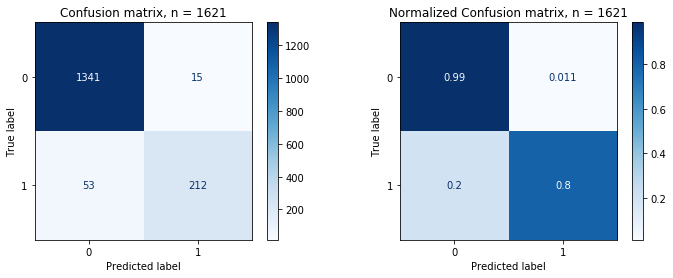

In [46]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

plot_confusion_matrix(pipe3, X_val, y_val,
                            cmap=plt.cm.Blues, 
                            ax=axes[0]);
axes[0].set_title(f'Confusion matrix, n = {len(y_val)}');

plot_confusion_matrix(pipe3, X_val, y_val,
                            normalize='true',
                            cmap=plt.cm.Blues, 
                            ax=axes[1]);
axes[1].set_title(f'Normalized Confusion matrix, n = {len(y_val)}');

In [47]:
print("Random Forest Classifier Classifier Val Accuracy Score:", accuracy_score(y_val, y_pred_val_3))
print("Random Forest Classifier Classifier Precision Score:", precision_score(y_val, y_pred_val_3))
print("Random Forest Classifier Recall Score:", recall_score(y_val, y_pred_val_3))
print("Random Forest Classifier F1 Score:", f1_score(y_val, y_pred_val_3))
y_pred_proba_3 = pipe2.predict_proba(X_val)[:, 1] # 이탈 확률
auc_score_3 = roc_auc_score(y_val, y_pred_proba_3)
print("Random Forest Classifier AUC Score:", auc_score_3)

Random Forest Classifier Classifier Val Accuracy Score: 0.9580505860579889
Random Forest Classifier Classifier Precision Score: 0.933920704845815
Random Forest Classifier Recall Score: 0.8
Random Forest Classifier F1 Score: 0.861788617886179
Random Forest Classifier AUC Score: 0.9521970835420493


Random Forest Classifier는 Decision Tree와 비교했을 때 **Recall Score은 떨어졌지만 나머지 성능지표들은 모두 향상하였습니다**. Recall Score까지 향상시킬 수 있는 Gradient Boosting 방식의 프레임 워크를 적용해보고자 합니다.

#### <4. LGBMClassifier>

Random Forest의 장점은 하이퍼파라미터에 상대적으로 덜 민감한 것인데, **Gradient Boosting의 경우 하이퍼파라미터 셋팅에 따라 Random Forest보다 더 좋은 예측 성능**을 보여줄 수도 있습니다. Gradient Boosting 기반의 알고리즘 중에서도 **LightGBM**은 XGBoost와 GBM에 비해 훨씬 더 학습에 걸리는 시간이 적다는 점에서 장점을 가집니다. 또한 성능상 XGBoost와도 큰 차이가 없고, 기능상 다양성이 많다는 것도 장점입니다.

In [48]:
pipe4= make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    LGBMClassifier(random_state=2, n_jobs=-1, is_unbalance = True, boost_from_average=False)
)

pipe4.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Marital_Status'],
                               use_cat_names=True)),
                ('lgbmclassifier',
                 LGBMClassifier(boost_from_average=False, is_unbalance=True,
                                random_state=2))])

In [49]:
y_pred_val_4 = pipe4.predict(X_val)

In [50]:
print(classification_report(y_val, y_pred_val_4));

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1356
           1       0.90      0.94      0.92       265

    accuracy                           0.97      1621
   macro avg       0.94      0.96      0.95      1621
weighted avg       0.97      0.97      0.97      1621



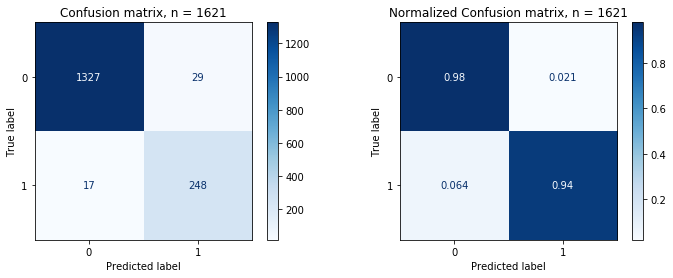

In [51]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

plot_confusion_matrix(pipe4, X_val, y_val,
                            cmap=plt.cm.Blues, 
                            ax=axes[0]);
axes[0].set_title(f'Confusion matrix, n = {len(y_val)}');

plot_confusion_matrix(pipe4, X_val, y_val,
                            normalize='true',
                            cmap=plt.cm.Blues, 
                            ax=axes[1]);
axes[1].set_title(f'Normalized Confusion matrix, n = {len(y_val)}');

In [52]:
print("LGBMClassifier Val Accuracy Score:", accuracy_score(y_val, y_pred_val_4))
print("LGBMClassifier Precision Score:", precision_score(y_val, y_pred_val_4))
print("LGBMClassifier Recall Score:", recall_score(y_val, y_pred_val_4))
print("LGBMClassifier F1 Score:", f1_score(y_val, y_pred_val_4))
y_pred_proba_4 = pipe4.predict_proba(X_val)[:, 1] # 이탈 확률
auc_score_4 = roc_auc_score(y_val, y_pred_proba_4)
print("LGBMClassifier AUC Score:", auc_score_4)

LGBMClassifier Val Accuracy Score: 0.9716224552745218
LGBMClassifier Precision Score: 0.8953068592057761
LGBMClassifier Recall Score: 0.9358490566037736
LGBMClassifier F1 Score: 0.9151291512915127
LGBMClassifier AUC Score: 0.9947821005176156


LightGBM 같은 경우는 Precision(정밀도)이 살짝 감소한 것을 제외하면 **Recall(재현율)과 AUC가 증가**하는 것을 볼 수 있습니다다.

### 💡 5가지 1차 모델 성능 지표 비교

In [53]:
metrics_no_tuning = pd.DataFrame({
    'Accuracy': [accuracy_score(y_val, y_pred_val_0), accuracy_score(y_val, y_pred_val_1), accuracy_score(y_val, y_pred_val_2), accuracy_score(y_val, y_pred_val_3), accuracy_score(y_val, y_pred_val_4)],
    'Precision': [precision_score(y_val, y_pred_val_0), precision_score(y_val, y_pred_val_1), precision_score(y_val, y_pred_val_2), precision_score(y_val, y_pred_val_3), precision_score(y_val, y_pred_val_4)],
    'Recall': [recall_score(y_val, y_pred_val_0), recall_score(y_val, y_pred_val_1), recall_score(y_val, y_pred_val_2), recall_score(y_val, y_pred_val_3), recall_score(y_val, y_pred_val_4)],
    'F1 Score': [f1_score(y_val, y_pred_val_0), f1_score(y_val, y_pred_val_1), f1_score(y_val, y_pred_val_2), f1_score(y_val, y_pred_val_3), f1_score(y_val, y_pred_val_4)],
    'AUC': [auc_score_0, auc_score_1, auc_score_2, auc_score_3, auc_score_4]},
    index=['Baseline', 'Logistic', 'Decision Tree', 'Random Forest', 'LGBM']
)

In [54]:
metrics_no_tuning

,Accuracy,Precision,Recall,F1 Score,AUC
Baseline,0.836521,0.000000,0.000000,0.000000,0.500000
Logistic,0.864898,0.556098,0.860377,0.675556,0.938952
Decision Tree,0.895126,0.623377,0.905660,0.738462,0.952197
Random Forest,0.958051,0.933921,0.800000,0.861789,0.952197
LGBM,0.971622,0.895307,0.935849,0.915129,0.994782


다섯가지 1차 모델 중 Accuracy, Recall, F1 Score, AUC가 가장 높은 모델은 **<1> LightGBM** 모델이고, Precision이 가장 높은 모델은 **<2> Random Forest Classifier**이었습니다. 이 두가지 모델들의 성능을 **Cross Validation, Hyperparameter Tuning** 등의 과정을 통해 개선해보고자 합니다.

### 교차 검증 (Cross Validation)

* 지금까지는 데이터를 훈련/검증/테스트 셋으로 나누어 학습을 진행해 왔습니다. 이 방법은 **Hold-out 교차검증**이라고 합니다. Hold-out 교차검증의 문제점은 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 
* 머신러닝 프로젝트에서 가장 중요한 목표는 **'얼마만큼 훌륭하게 일반화된 모델을 만들어내는가'**인데 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.
* 이를 해결하기 위해 **K-fold 교차 검증**은 데이터셋을 훈련/검증/테스트 셋으로 한번 나누는 것에 그치지 않고 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다.

#### <1. Random Forest Classifier>

In [55]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import make_scorer

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'AUC': make_scorer(roc_auc_score)}

# 10-fold 교차검증을 수행합니다.
kfold = KFold(n_splits=10, shuffle=True, random_state=2)
scores1 = cross_validate(pipe3, X_train, y_train, cv=kfold, 
                         scoring=scoring)
print('n_splits={}, Cross Validation score: {}'.format(10, scores1))

n_splits=10, Cross Validation score: {'fit_time': array([2.10590363, 0.57645774, 0.53483438, 0.55852509, 0.59823394,
       0.57669973, 0.56723166, 0.53169489, 0.538836  , 0.55305529]), 'score_time': array([0.15512013, 0.14658737, 0.1394825 , 0.1631496 , 0.15009689,
       0.14277172, 0.1237824 , 0.1281209 , 0.14699411, 0.14928436]), 'test_accuracy': array([0.9537037 , 0.9382716 , 0.96450617, 0.93364198, 0.96759259,
       0.94135802, 0.96296296, 0.96296296, 0.94444444, 0.95833333]), 'test_precision': array([0.93396226, 0.87951807, 0.93670886, 0.90804598, 0.90721649,
       0.93023256, 0.97647059, 0.91489362, 0.94444444, 0.87012987]), 'test_recall': array([0.81147541, 0.70873786, 0.80434783, 0.69298246, 0.88      ,
       0.71428571, 0.79047619, 0.84313725, 0.73275862, 0.79761905]), 'test_f1_score': array([0.86842105, 0.78494624, 0.86549708, 0.78606965, 0.89340102,
       0.80808081, 0.87368421, 0.87755102, 0.82524272, 0.83229814]), 'test_AUC': array([0.89908371, 0.84519462, 0.89767751

In [56]:
print('교차검증 Accuracy Score:', scores1['test_accuracy'].mean(), '(STD:', scores1['test_accuracy'].std(), ')')
print('교차검증 Precision Score:', scores1['test_precision'].mean(), '(STD:', scores1['test_precision'].std(), ')')
print('교차검증 Recall Score:', scores1['test_recall'].mean(), '(STD:', scores1['test_recall'].std(), ')')
print('교차검증 F1 Score:', scores1['test_f1_score'].mean(), '(STD:', scores1['test_f1_score'].std(), ')')
print('교차검증 AUC Score:', scores1['test_AUC'].mean(), '(STD:', scores1['test_AUC'].std(), ')')

교차검증 Accuracy Score: 0.9527777777777778 (STD: 0.011716205491421166 )
교차검증 Precision Score: 0.920162274702687 (STD: 0.029703937625253585 )
교차검증 Recall Score: 0.7775820384113612 (STD: 0.05927225933029697 )
교차검증 F1 Score: 0.8415191926291682 (STD: 0.0375053082362201 )
교차검증 AUC Score: 0.8823554030096048 (STD: 0.029650918703989858 )


Random Forest Classifier의 Hold-Out 교차검증과 K-fold 교차검증을 비교해보겠습니다.

In [57]:
pd.DataFrame({
    'Accuracy': [accuracy_score(y_val, y_pred_val_3), scores1['test_accuracy'].mean()],
    'Precision': [precision_score(y_val, y_pred_val_3), scores1['test_precision'].mean()],
    'Recall': [recall_score(y_val, y_pred_val_3), scores1['test_recall'].mean()],
    'F1 Score': [f1_score(y_val, y_pred_val_3), scores1['test_f1_score'].mean()],
    'AUC': [auc_score_3, scores1['test_AUC'].mean()]},
    index=['Hold-Out', 'K-fold (k=10)']
)

,Accuracy,Precision,Recall,F1 Score,AUC
Hold-Out,0.958051,0.933921,0.800000,0.861789,0.952197
K-fold (k=10),0.952778,0.920162,0.777582,0.841519,0.882355


K-fold 교차검증 결과 Random Forest Classifier의 모든 성능 평가지표들이 약간씩 줄어든 것을 알 수 있으며 특히 AUC의 하락폭이 큰 것으로 나타났습니다.

#### <2. LBGMClassifier>

In [58]:
# 10-fold 교차검증을 수행합니다.
kfold = KFold(n_splits=10, shuffle=True, random_state=2)
scores2 = cross_validate(pipe4, X_train, y_train, cv=kfold, 
                         scoring=scoring)
print('n_splits={}, Cross Validation score: {}'.format(10, scores2))

n_splits=10, Cross Validation score: {'fit_time': array([0.2852354 , 0.2483356 , 0.24833608, 0.26229763, 0.27326941,
       0.24833488, 0.24886107, 0.25232553, 0.2902236 , 0.30318713]), 'score_time': array([0.03490734, 0.03989339, 0.03590393, 0.03390908, 0.03690171,
       0.0349071 , 0.03590345, 0.0349071 , 0.03590536, 0.0398941 ]), 'test_accuracy': array([0.96450617, 0.9691358 , 0.96604938, 0.95679012, 0.95833333,
       0.9691358 , 0.97376543, 0.97685185, 0.97222222, 0.97376543]), 'test_precision': array([0.88372093, 0.88073394, 0.85      , 0.88392857, 0.82882883,
       0.93396226, 0.9       , 0.90654206, 0.9375    , 0.85263158]), 'test_recall': array([0.93442623, 0.93203883, 0.92391304, 0.86842105, 0.92      ,
       0.88392857, 0.94285714, 0.95098039, 0.90517241, 0.96428571]), 'test_f1_score': array([0.90836653, 0.90566038, 0.88541667, 0.87610619, 0.87203791,
       0.90825688, 0.92093023, 0.92822967, 0.92105263, 0.90502793]), 'test_AUC': array([0.95295456, 0.95409281, 0.94846731

In [59]:
print('교차검증 Accuracy Score:', scores2['test_accuracy'].mean(), '(STD:', scores2['test_accuracy'].std(), ')')
print('교차검증 Precision Score:', scores2['test_precision'].mean(), '(STD:', scores2['test_precision'].std(), ')')
print('교차검증 Recall Score:', scores2['test_recall'].mean(), '(STD:', scores2['test_recall'].std(), ')')
print('교차검증 F1 Score:', scores2['test_f1_score'].mean(), '(STD:', scores2['test_f1_score'].std(), ')')
print('교차검증 AUC Score:', scores2['test_AUC'].mean(), '(STD:', scores2['test_AUC'].std(), ')')

교차검증 Accuracy Score: 0.9680555555555556 (STD: 0.006327160493827152 )
교차검증 Precision Score: 0.8857848174617166 (STD: 0.03359367866537172 )
교차검증 Recall Score: 0.9226023395090888 (STD: 0.028152248748528803 )
교차검증 F1 Score: 0.9031085030175602 (STD: 0.018282600251128746 )
교차검증 AUC Score: 0.949902270897337 (STD: 0.01369407395719551 )


In [60]:
pd.DataFrame({
    'Accuracy': [accuracy_score(y_val, y_pred_val_4), scores2['test_accuracy'].mean()],
    'Precision': [precision_score(y_val, y_pred_val_4), scores2['test_precision'].mean()],
    'Recall': [recall_score(y_val, y_pred_val_4), scores2['test_recall'].mean()],
    'F1 Score': [f1_score(y_val, y_pred_val_4), scores2['test_f1_score'].mean()],
    'AUC': [auc_score_4, scores2['test_AUC'].mean()]},
    index=['Hold-Out', 'K-fold (k=10)']
)

,Accuracy,Precision,Recall,F1 Score,AUC
Hold-Out,0.971622,0.895307,0.935849,0.915129,0.994782
K-fold (k=10),0.968056,0.885785,0.922602,0.903109,0.949902


K-fold 교차검증 결과 LBGM Classifier 또한 모든 성능 평가지표들이 약간씩 줄어든 것을 알 수 있으며 특히 AUC의 하락폭이 큰 것으로 나타났습니다.

하지만, Random Forest/LBGM Classifier **모두 10개의 Iteration 간 표준편차가 크지 않고 Hold-Out 교차검증 결과와 비교했을 때도 값의 차이가 매우 크다고 볼 수 없기 때문에 일반화된 모델을 만들 수 있다**는 결론을 내릴 수 있습니다.

### 2차 모델 학습 (Hyperparameter Tuning을 통한 모델 성능 개선)

K-fold 교차검증을 통해 1차 모델 학습에서 성능이 잘 나온 2개의 모델 (Random Forest/LBGM) 모두 일반화가 될 수 있다는 것을 조금 전에 확인했습니다. 이제부터는 각 모델들의 **Hyperparameter를 Randomized Search를 통해 Tuning하여 가장 성능이 좋은 최종 모델을 선정**하고자 합니다.

#### <1. Random Forest Classifier>

* OneHotEncoder 대신 Target Encoder 사용
* Hyperparameter Tuning (scoring = 'recall')

In [61]:
from scipy.stats import randint, uniform

pipe_random_tuning = make_pipeline(
    TargetEncoder(), 
    RandomForestClassifier(n_jobs=-1, class_weight='balanced', oob_score=True)
)

smoothing = [2.,20.,50.,60.,100.,500.,1000.] # int로 넣으면 error(bug)
min_samples_leaf = randint(1, 10)
n_estimators = [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)]
max_features = uniform(0, 1)
max_depth = [5, 10, 15, 20, 25, 30, None]
min_samples_split = [2, 5, 10]


random_grid = {'targetencoder__smoothing': smoothing,
               'targetencoder__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split}
        
random_clf = RandomizedSearchCV(pipe_random_tuning,
                                   param_distributions = random_grid,
                                   n_iter = 10,
                                   scoring = 'recall',               
                                   random_state = 2,
                                   verbose = 1,
                                   cv = 3,
                                   n_jobs = -1) 

random_clf.fit(X_train, y_train)

print('Finished RandomizedSearchCV ')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Finished RandomizedSearchCV 


In [62]:
print('최적 하이퍼파라미터: ', random_clf.best_params_)
print('Recall Score: ', random_clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.3205364371116073, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 600, 'targetencoder__min_samples_leaf': 6, 'targetencoder__smoothing': 50.0}
Recall Score:  0.919047619047619


In [63]:
# 만들어진 모델에거 가장 성능이 좋은 모델을 불러옵니다.
pipe_random_tuning = random_clf.best_estimator_

In [64]:
random_clf.best_score_

0.919047619047619

In [65]:
y_pred_val_rand_tuning = pipe_random_tuning.predict(X_val)

In [66]:
print(classification_report(y_val, y_pred_val_rand_tuning));

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1356
           1       0.71      0.92      0.80       265

    accuracy                           0.93      1621
   macro avg       0.85      0.93      0.88      1621
weighted avg       0.94      0.93      0.93      1621



In [67]:
print(" 성능개선 된 Random Forest Classifier Val Accuracy Score:", accuracy_score(y_val, y_pred_val_rand_tuning))
print(" 성능개선 된 Random Forest Classifier Precision Score:", precision_score(y_val, y_pred_val_rand_tuning))
print(" 성능개선 된 Random Forest Classifier Recall Score:", recall_score(y_val, y_pred_val_rand_tuning))
print(" 성능개선 된 Random Forest Classifier F1 Score:", f1_score(y_val, y_pred_val_rand_tuning))
y_pred_proba_rand_tuning = pipe_random_tuning.predict_proba(X_val)[:, 1] # 이탈 확률
auc_score_rand_tuning = roc_auc_score(y_val, y_pred_val_rand_tuning)
print(" 성능개선 된 Random Forest Classifier AUC Score:", auc_score_rand_tuning)

 성능개선 된 Random Forest Classifier Val Accuracy Score: 0.9265885256014805
 성능개선 된 Random Forest Classifier Precision Score: 0.7122093023255814
 성능개선 된 Random Forest Classifier Recall Score: 0.9245283018867925
 성능개선 된 Random Forest Classifier F1 Score: 0.8045977011494253
 성능개선 된 Random Forest Classifier AUC Score: 0.9257597261646352


In [68]:
pd.DataFrame({
    'Accuracy': [accuracy_score(y_val, y_pred_val_3), accuracy_score(y_val, y_pred_val_rand_tuning)],
    'Precision': [precision_score(y_val, y_pred_val_3), precision_score(y_val, y_pred_val_rand_tuning)],
    'Recall': [recall_score(y_val, y_pred_val_3), recall_score(y_val, y_pred_val_rand_tuning)],
    'F1 Score': [f1_score(y_val, y_pred_val_3), f1_score(y_val, y_pred_val_rand_tuning)],
    'AUC': [auc_score_3, roc_auc_score(y_val, y_pred_val_rand_tuning)]},
    index=['Recall 성능향상 전', 'Recall 성능향상 후']
)

,Accuracy,Precision,Recall,F1 Score,AUC
Recall 성능향상 전,0.958051,0.933921,0.800000,0.861789,0.952197
Recall 성능향상 후,0.926589,0.712209,0.924528,0.804598,0.925760


Recall 지표 향상을 목적으로 Tuning되었기 때문에 다른 지표들이 급격히 떨어진 것을 볼 수 있습니다. Precision 지표가 특히 많이 하락하여 Random Forest Classifier는 사용하기 어려울 것 같습니다.

#### <2. LGBMClassifier>

* OneHotEncoder 대신 Target Encoder 사용
* Hyperparameter Tuning (scoring = 'recall')

In [69]:
pipe_lgbm_tuning = make_pipeline(
    TargetEncoder(), 
    LGBMClassifier(random_state=2, n_jobs=-1, is_unbalance = True, boost_from_average=False)
)

lgbm_grid = {
          'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],
          'targetencoder__min_samples_leaf': randint(1, 10),
          'lgbmclassifier__learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
          'lgbmclassifier__n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
          'lgbmclassifier__num_leaves': randint(6, 50), 
          'lgbmclassifier__min_child_samples': randint(100, 500), 
          'lgbmclassifier__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
          'lgbmclassifier__subsample': uniform(loc = 0.2, scale = 0.8), 
          'lgbmclassifier__max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
          'lgbmclassifier__colsample_bytree': uniform(loc = 0.4, scale = 0.6),
          'lgbmclassifier__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
          'lgbmclassifier__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

lgbm_clf = RandomizedSearchCV(pipe_lgbm_tuning,
                                   param_distributions = lgbm_grid,
                                   n_iter = 10,
                                   scoring = 'recall',               
                                   random_state = 2,
                                   verbose = 1,
                                   cv = 3,
                                   n_jobs = -1) 

lgbm_clf.fit(X_train, y_train)

print('Finished RandomizedSearchCV ')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Finished RandomizedSearchCV 


In [70]:
print('최적 하이퍼파라미터: ', lgbm_clf.best_params_)
print('Recall Score: ', lgbm_clf.best_score_)

최적 하이퍼파라미터:  {'lgbmclassifier__colsample_bytree': 0.7796426383605621, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_child_samples': 267, 'lgbmclassifier__min_child_weight': 0.1, 'lgbmclassifier__n_estimators': 800, 'lgbmclassifier__num_leaves': 10, 'lgbmclassifier__reg_alpha': 2, 'lgbmclassifier__reg_lambda': 100, 'lgbmclassifier__subsample': 0.4067984691499191, 'targetencoder__min_samples_leaf': 2, 'targetencoder__smoothing': 50.0}
Recall Score:  0.940952380952381


In [71]:
# 만들어진 모델에거 가장 성능이 좋은 모델을 불러옵니다.
pipe_lgbm_tuning = lgbm_clf.best_estimator_

In [72]:
lgbm_clf.best_score_

0.940952380952381

In [73]:
y_pred_val_lgbm_tuning = pipe_lgbm_tuning.predict(X_val)

In [74]:
print(classification_report(y_val, y_pred_val_lgbm_tuning));

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1356
           1       0.84      0.96      0.89       265

    accuracy                           0.96      1621
   macro avg       0.91      0.96      0.93      1621
weighted avg       0.97      0.96      0.96      1621



In [75]:
print(" 성능개선 된 LGBMClassifier Val Accuracy Score:", accuracy_score(y_val, y_pred_val_lgbm_tuning))
print(" 성능개선 된 LGBMClassifier Precision Score:", precision_score(y_val, y_pred_val_lgbm_tuning))
print(" 성능개선 된 LGBMClassifier Recall Score:", recall_score(y_val, y_pred_val_lgbm_tuning))
print(" 성능개선 된 LGBMClassifier F1 Score:", f1_score(y_val, y_pred_val_lgbm_tuning))
y_pred_proba_lgbm_tuning = pipe_lgbm_tuning.predict_proba(X_val)[:, 1] # 이탈 확률
auc_score_lgbm_tuning = roc_auc_score(y_val, y_pred_val_lgbm_tuning)
print(" 성능개선 된 LGBMClassifier AUC Score:", auc_score_lgbm_tuning)

 성능개선 된 LGBMClassifier Val Accuracy Score: 0.9623689080814312
 성능개선 된 LGBMClassifier Precision Score: 0.8355263157894737
 성능개선 된 LGBMClassifier Recall Score: 0.9584905660377359
 성능개선 된 LGBMClassifier F1 Score: 0.8927943760984183
 성능개선 된 LGBMClassifier AUC Score: 0.9608087048477765


In [76]:
pd.DataFrame({
    'Accuracy': [accuracy_score(y_val, y_pred_val_4), accuracy_score(y_val, y_pred_val_lgbm_tuning)],
    'Precision': [precision_score(y_val, y_pred_val_4), precision_score(y_val, y_pred_val_lgbm_tuning)],
    'Recall': [recall_score(y_val, y_pred_val_4), recall_score(y_val, y_pred_val_lgbm_tuning)],
    'F1 Score': [f1_score(y_val, y_pred_val_4), f1_score(y_val, y_pred_val_lgbm_tuning)],
    'AUC': [auc_score_4, roc_auc_score(y_val, y_pred_val_lgbm_tuning)]},
    index=['Recall 성능향상 전', 'Recall 성능향상 후']
)

,Accuracy,Precision,Recall,F1 Score,AUC
Recall 성능향상 전,0.971622,0.895307,0.935849,0.915129,0.994782
Recall 성능향상 후,0.962369,0.835526,0.958491,0.892794,0.960809


LGBM Classifier도 Recall 지표 향상을 목적으로 Tuning되었기 때문에 랜덤포레스트와 마찬가지로 다른 지표들이 급격히 떨어진 것을 볼 수 있습니다. 하지만 랜덤포레스트에 비해 다른 지표들의 하락 정도가 적기 때문에 **RandomizedSearch를 통해 Hyperparameter가 Tuning된 이 LGBM Classifier ("pipe_lgbm_tuning")를 최종모델로 선정**하겠습니다.

### 최종 모델의 Test 점수

In [77]:
y_pred_test_lgbm_tuning = pipe_lgbm_tuning.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred_test_lgbm_tuning));

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1714
           1       0.81      0.93      0.87       312

    accuracy                           0.96      2026
   macro avg       0.90      0.95      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [79]:
pd.DataFrame({
    'Accuracy': [accuracy_score(y_val, y_pred_val_lgbm_tuning), accuracy_score(y_test, y_pred_test_lgbm_tuning)],
    'Precision': [ precision_score(y_val, y_pred_val_lgbm_tuning), precision_score(y_test, y_pred_test_lgbm_tuning)],
    'Recall': [recall_score(y_val, y_pred_val_lgbm_tuning), recall_score(y_test, y_pred_test_lgbm_tuning)],
    'F1 Score': [f1_score(y_val, y_pred_val_lgbm_tuning), f1_score(y_test, y_pred_test_lgbm_tuning)],
    'AUC': [roc_auc_score(y_val, y_pred_val_lgbm_tuning), roc_auc_score(y_test, y_pred_test_lgbm_tuning)]},
    index=['Validation', 'Test']
)

,Accuracy,Precision,Recall,F1 Score,AUC
Validation,0.962369,0.835526,0.958491,0.892794,0.960809
Test,0.956565,0.812849,0.932692,0.868657,0.946801


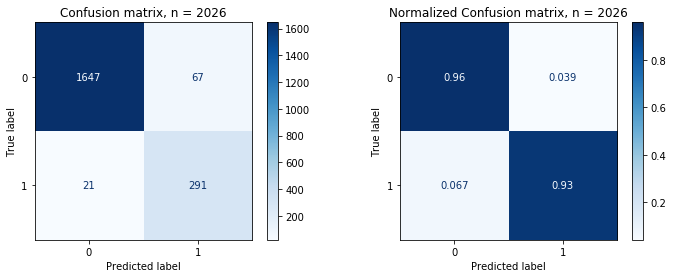

In [80]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

plot_confusion_matrix(pipe_lgbm_tuning, X_test, y_test,
                            cmap=plt.cm.Blues, 
                            ax=axes[0]);
axes[0].set_title(f'Confusion matrix, n = {len(y_test)}');

plot_confusion_matrix(pipe_lgbm_tuning, X_test, y_test,
                            normalize='true',
                            cmap=plt.cm.Blues, 
                            ax=axes[1]);
axes[1].set_title(f'Normalized Confusion matrix, n = {len(y_test)}');

## 5) 머신러닝 모델 해석

### Permutation Importances(순열 중요도)

데이터셋 내 특성들의 중요도를 계산하는 방법 중 하나인 **순열 중요도**에 대해 다루고자 합니다. **순열 중요도 측정**은 관심있는 특성에만 무작위로 노이즈를 주고 예측을 하였을 때 성능 평가지표(Accuracy, F1 등)가 얼마나 감소하는지를 측정합니다.

In [81]:
pipe_lgbm_tuning # 최종모델

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['Gender', 'Marital_Status'],
                               min_samples_leaf=2, smoothing=50.0)),
                ('lgbmclassifier',
                 LGBMClassifier(boost_from_average=False,
                                colsample_bytree=0.7796426383605621,
                                is_unbalance=True, learning_rate=0.05,
                                max_depth=5, min_child_samples=267,
                                min_child_weight=0.1, n_estimators=800,
                                num_leaves=10, random_state=2, reg_alpha=2,
                                reg_lambda=100,
                                subsample=0.4067984691499191))])

In [82]:
permuter = PermutationImportance(
    pipe_lgbm_tuning.named_steps['lgbmclassifier'], # model
    scoring='recall', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_test을 사용합니다.
X_test_transformed = pipe_lgbm_tuning.named_steps['targetencoder'].transform(X_test)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_test);

In [83]:
feature_names = df.drop(columns = 'Attrition_Flag').columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Customer_Age               -0.003846
Gender                     -0.003846
Dependent_count            -0.002564
Educ_Ordinal               -0.001282
Marital_Status             -0.000641
Card_Ordinal                0.000000
Months_on_book              0.001923
Income_Ordinal              0.002564
Avg_Utilization_Ratio       0.003205
Credit_Limit                0.003846
Months_Inactive_12_mon      0.007692
Contacts_Count_12_mon       0.008333
Total_Relationship_Count    0.023718
Total_Ct_Chng_Q4_Q1         0.026923
Total_Revolving_Bal         0.037179
Total_Amt_Chng_Q4_Q1        0.039744
Avg_Trans_Amt               0.071795
Total_Trans_Amt             0.134615
Total_Trans_Ct              0.375641
dtype: float64

In [84]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.3756 ± 0.0392,Total_Trans_Ct
0.1346 ± 0.0157,Total_Trans_Amt
0.0718 ± 0.0170,Avg_Trans_Amt
0.0397 ± 0.0155,Total_Amt_Chng_Q4_Q1
0.0372 ± 0.0221,Total_Revolving_Bal
0.0269 ± 0.0193,Total_Ct_Chng_Q4_Q1
0.0237 ± 0.0201,Total_Relationship_Count
0.0083 ± 0.0104,Contacts_Count_12_mon
0.0077 ± 0.0077,Months_Inactive_12_mon
0.0038 ± 0.0085,Credit_Limit


최종 LGBM 모델에서 가장 중요한 특성으로 분류된 다섯가지 특성들은 **Total Trans Ct, Total Trans Amt, Avg Trans Amt, Total Revolving Bal, Total Ct Chng Q4_Q1**입니다.

### PDP

#### <특성 1개 사용>

* 선형모델은 회귀계수(coefficients)를 이용해 변수와 타겟 관계를 해석할 수 있지만 트리모델은 할 수 없습니다. 대신 **부분의존그림(Partial dependence plots)**을 사용하여 개별 특성과 타겟간의 관계를 볼 수 있습니다.
* 순열 중요도 상위 5개의 특성들을 골라 PDP를 만들고자 합니다.

In [85]:
!python -m pip install --user PDPbox

distutils: C:\Users\yeink\AppData\Roaming\Python\Python37\Include\UNKNOWN
sysconfig: C:\Users\yeink\AppData\Roaming\Python\Python37\Include
user = True
home = None
root = None
prefix = None


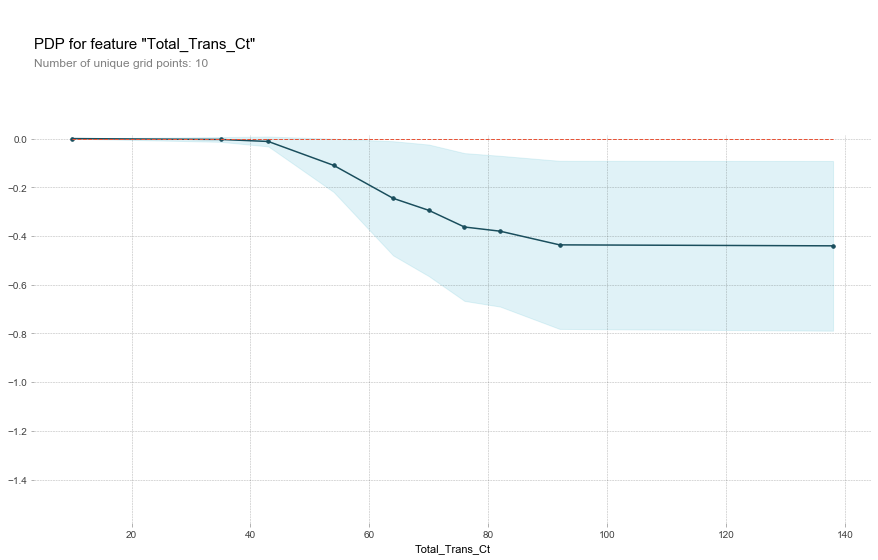

In [86]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Total_Trans_Ct'

isolated = pdp_isolate(
    model=pipe_lgbm_tuning, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

**Total_Trans_Ct:** 총 거래횟수가 40회 미만일 때는 이탈 여부에 영향을 주지 않았지만 40회 이후로 증가할수록 이탈할 확률이 낮아집니다.

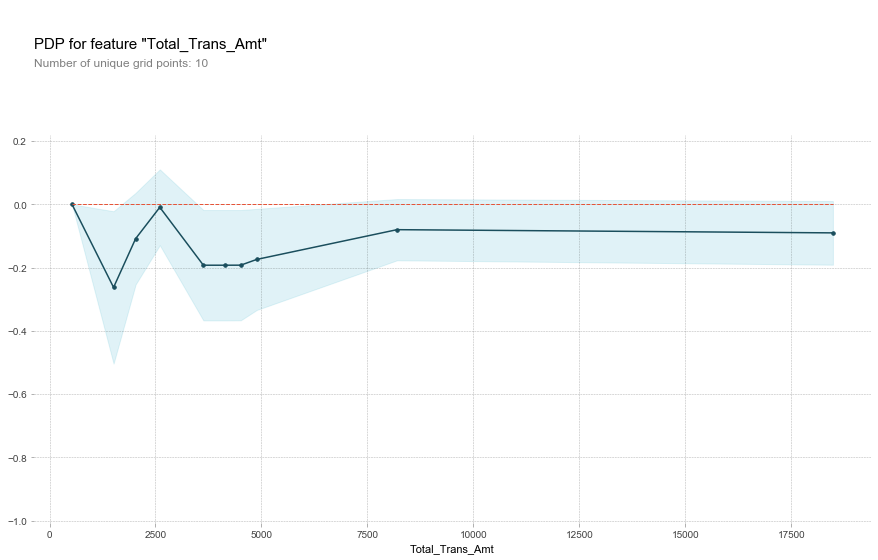

In [87]:
feature = 'Total_Trans_Amt'

isolated = pdp_isolate(
    model=pipe_lgbm_tuning, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

**Total_Trans_Amt:** 총 거래 금액이 $1300일 때 이탈 확률이 가능 낮고 그 이후로는 오히려 이탈 확률에 주는 영향력이 감소합니다.

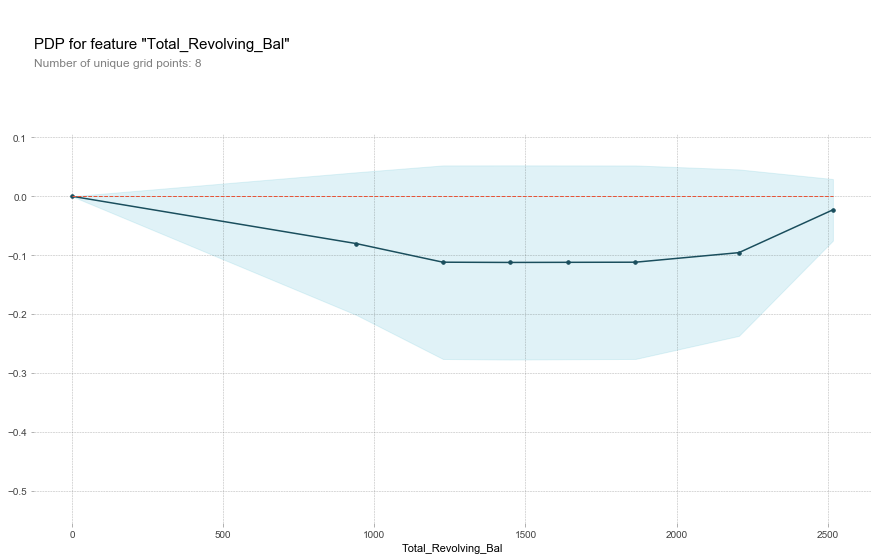

In [88]:
feature = 'Total_Revolving_Bal'

isolated = pdp_isolate(
    model=pipe_lgbm_tuning, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

**Total_Revolving_Bal:** 신용카드 미납(연체) 금액(바로 납부하지 않아 다음 달로 넘어가는 금액)이 증가할수록 이탈 확률이 낮아지는데 이 금액이 $2000을 초과하면 다시 이탈 확률이 서서히 높아집니다.

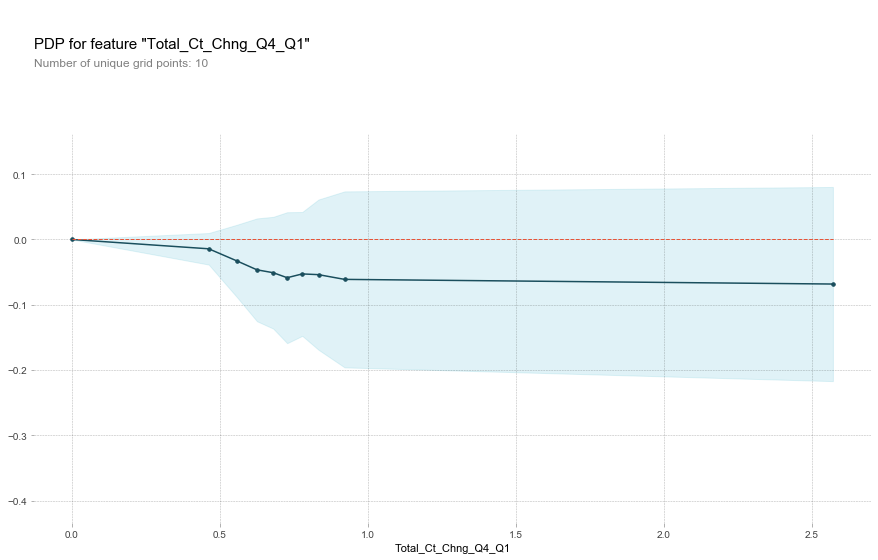

In [89]:
feature = 'Total_Ct_Chng_Q4_Q1'

isolated = pdp_isolate(
    model=pipe_lgbm_tuning, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

**Total_Ct_Chng_Q4_Q1:** 1분기에 비해 4분기에 거래 횟수가 늘어날수록 이탈 확률이 낮아집니다.

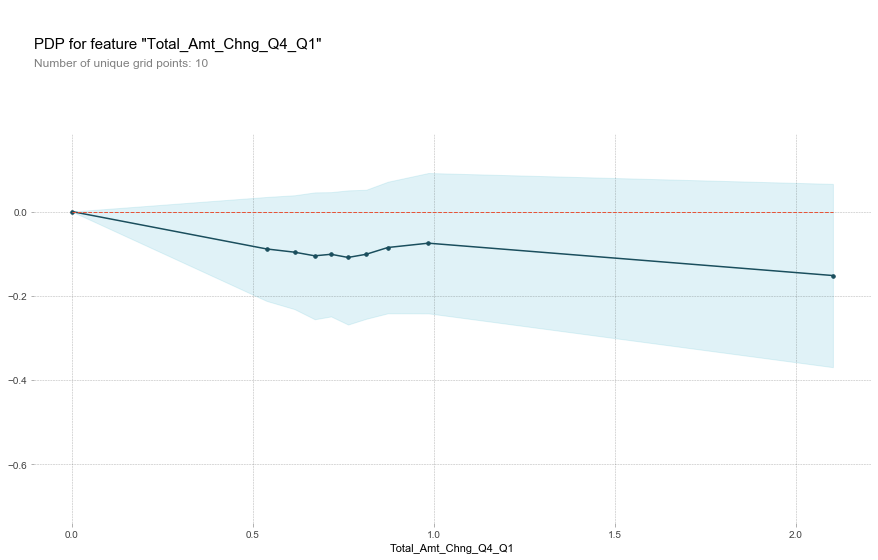

In [90]:
feature = 'Total_Amt_Chng_Q4_Q1'

isolated = pdp_isolate(
    model=pipe_lgbm_tuning, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

**Total_Amt_Chng_Q4_Q1:** 1분기에 비해 4분기에 거래 금액이 늘어날수록 이탈 확률이 낮아집니다.

### SHAP

**Shapley value**는 원래 게임이론에서 나온 개념이지만 복잡한 머신러닝모델의 예측을 설명하기 위한 매우 유용한 방법을 제공해 줍니다.

In [91]:
!python -m pip install --upgrade pip
!python -m pip install shap

import shap

  Using cached pip-21.1.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.1
    Uninstalling pip-21.1:
      Successfully uninstalled pip-21.1
  Rolling back uninstall of pip
  Moving to c:\users\yeink\appdata\roaming\python\python37\scripts\
   from c:\users\yeink\appdata\roaming\python\python37\~cripts
  Moving to c:\users\yeink\appdata\roaming\python\python37\site-packages\pip-21.1.dist-info\
   from c:\users\yeink\appdata\roaming\python\python37\site-packages\~ip-21.1.dist-info
  Moving to c:\users\yeink\appdata\roaming\python\python37\site-packages\pip\
   from c:\users\yeink\appdata\roaming\python\python37\site-packages\~ip


distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\yeink\AppData\Roaming\Python\Python37\site-packages\pip\_internal\cli\base_command.py", line 180, in _main
    status = self.run(options, args)
  File "C:\Users\yeink\AppData\Roaming\Python\Python37\site-packages\pip\_internal\cli\req_command.py", line 204, in wrapper
    return func(self, options, args)
  File "C:\Users\yeink\AppData\Roaming\Python\Python37\site-packages\pip\_internal\commands\install.py", line 402, in run
    pycompile=options.compile,
  File "C:\Users\yeink\AppData\Roaming\Python\Python37\site-packages\pip\_internal\req\__init__.py", line 85, in install_given_reqs
    pycompile=pycompile,
  File "C:\Users\yeink\AppData\Roaming\Python\Python37\site-packages\pip\_internal\req\req_install.py", line 790, in install
    requested=self.user_supplied,
  File "

distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\yeink\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\yeink\Anaconda3\Include
user = False
home = None
root = None
prefix = None


In [92]:
!python -m pip list

Package                            Version
---------------------------------- ---------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.2
argh                               0.26.2
asn1crypto                         0.24.0
astroid                            2.2.5
astropy                            3.1.2
atomicwrites                       1.3.0
attrs                              20.3.0
autograd                           1.3
autograd-gamma                     0.4.2
autopep8                           1.5.2
Babel                              2.6.0
backcall                           0.1.0
backports.os                       0.1.1
backports.shutil-get-terminal-size 1.0.0
bcrypt                             3.1.7
beautifulsoup4                     4.7.1
bitarray                           0.8.3
bkcharts                           0.2
bleach                             3.1.0
bokeh    

In [93]:
pipe_lgbm_tuning

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['Gender', 'Marital_Status'],
                               min_samples_leaf=2, smoothing=50.0)),
                ('lgbmclassifier',
                 LGBMClassifier(boost_from_average=False,
                                colsample_bytree=0.7796426383605621,
                                is_unbalance=True, learning_rate=0.05,
                                max_depth=5, min_child_samples=267,
                                min_child_weight=0.1, n_estimators=800,
                                num_leaves=10, random_state=2, reg_alpha=2,
                                reg_lambda=100,
                                subsample=0.4067984691499191))])

In [94]:
X_train

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans_Amt,Income_Ordinal,Card_Ordinal,Educ_Ordinal
9047,50,M,1,Unknown,36,2,3,2,34516.0,0,1.032,5547,75,0.744,0.000,73.960000,4,3,5
137,45,M,4,Divorced,40,5,1,0,10408.0,1186,1.689,2560,42,1.211,0.114,60.952381,3,1,3
3538,46,M,3,Single,38,4,1,2,8101.0,1266,0.615,3226,53,0.710,0.156,60.867925,4,1,4
6803,56,F,1,Unknown,36,5,4,1,5204.0,0,1.008,5285,82,0.864,0.000,64.451220,2,1,4
2290,32,M,0,Married,27,3,3,2,4815.0,1591,1.409,2501,36,0.714,0.330,69.472222,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8832,46,M,3,Single,32,2,1,3,34516.0,1954,0.755,7594,69,0.725,0.057,110.057971,4,2,3
1925,62,F,0,Single,49,5,1,2,30310.0,0,0.777,3703,91,0.492,0.000,40.692308,0,2,4
4933,39,M,5,Married,29,3,3,4,34198.0,1804,0.934,4270,59,0.639,0.053,72.372881,4,1,3
9033,44,M,2,Unknown,39,1,2,3,34516.0,1601,0.686,7491,86,0.720,0.046,87.104651,3,2,2


In [112]:
encoder = OneHotEncoder()

In [114]:
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

model =  LGBMClassifier(boost_from_average=False,
                                colsample_bytree=0.7796426383605621,
                                is_unbalance=True, learning_rate=0.05,
                                max_depth=5, min_child_samples=267,
                                min_child_weight=0.1, n_estimators=800,
                                num_leaves=10, random_state=2, reg_alpha=2,
                                reg_lambda=100,
                                subsample=0.4067984691499191)

model.fit(X_train_encoded, y_train)

LGBMClassifier(boost_from_average=False, colsample_bytree=0.7796426383605621,
               is_unbalance=True, learning_rate=0.05, max_depth=5,
               min_child_samples=267, min_child_weight=0.1, n_estimators=800,
               num_leaves=10, random_state=2, reg_alpha=2, reg_lambda=100,
               subsample=0.4067984691499191)

In [130]:
row = X_test_encoded.iloc[[1]] 
row

,Customer_Age,Gender_1,Gender_2,Dependent_count,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans_Amt,Income_Ordinal,Card_Ordinal,Educ_Ordinal
3536,63,1,0,1,0,0,1,0,51,5,3,2,6102.0,0,0.639,4527,67,0.558,0.0,67.567164,1,1,2


In [121]:
model.predict(row)

array([0], dtype=int64)

In [149]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0], 
    features=row,
    link='logit' 
)

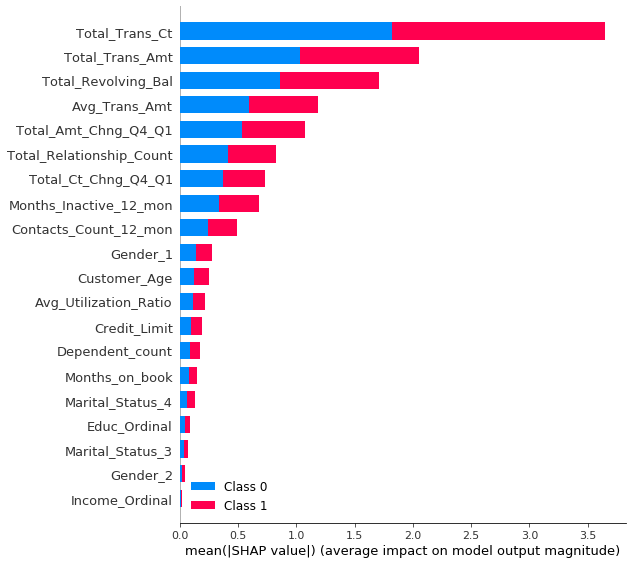

In [138]:
shap_values = explainer.shap_values(X_test_encoded.iloc[:400])
shap.summary_plot(shap_values, X_train_encoded.iloc[:400])

### 기타: 아쉬운 점

* 별도의 결측치 처리나 의미있는 Feature Engineering을 하지 않아도 되는 가상의 데이터셋을 사용했기 때문에 실제 현업에서 주어지는 프로젝트처럼 연습하지 못했다는 점에서 아쉬움이 남습니다. 한정된 시간 안에 저의 관심사와 부합하는 데이터셋을 찾는 것이 매우 어려웠는데 다음번엔 더 다양한 Source들을 참조하여 실제 데이터셋을 구하고 모델링을 해보고 싶습니다.